# 09. 자동 미분 및 최적화 (Automatic differentiation & optimisation)
- 계산 통계학에서 많은 문제들은 고차원 공간 상에서 복잡한 함수의 탐색 또는 최적화를 포함
- 이러한 문제들은 함수의 도함수나 그래디언트 정보가 제공될 경우, 함수의 국소적인 형태에 관한 중요한 정보를 통해 보다 효율적으로 해결가능

*도함수에 의해 정의된 함수와 그 접선*

<img src='https://www.cs.helsinki.fi/u/ahonkela/teaching/compstats1/book/compstats1_files/figure-html/unnamed-chunk-56-1.png'>

- 자동 미분(autodiff)은 `TensorFlow`, `Torch`, `PyTorch`, `Stan` 등과 같이 기계 학습 및 통계 분야에서 사용되는 최신 소프트웨어 라이브러리와 툴킷의 핵심 기술

<br>

## 09-01. 다변량 함수 $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$의 도함수
- $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$ : 함수$f$가 $n$차원의 실수 공간 (입력 벡터)에서 정의되어, $m$차원의 실수 공간 (출력 벡터)로 값을 매핑
    - 예: $n=2$이고,$m=3$인 경우, $f$는 두 개의 실수로 구성된 벡터를 입력 받아, 세 개의 실수로 구성된 벡터를 반환
    
<br>

#### $m=1, n=1$
- **그래디언트** : 각 좌표 방향으로 함수의 변화율을 나타내는 $n$차원 편미분 벡터
    - **기하학적으로, 그래디언트는 함수가 가장 빠르게 증가하는 방향을 가리킴**
$$\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n} \right).$$


<br>

#### $n, m > 1$
- **자코비안(Jacobian) 행렬** : 각 출력 성분에 대해 각 입력 변수의 편미분을 모은 $m×n$행렬
    - **기하학적으로, 자코비안 행렬은 함수 $𝑓$를 국소적으로 선형 근사가 가장 잘되는 지점을 제공**   
    
$$J_{ij} = \frac{\partial f_i}{\partial x_j}.$$


<br>

#### $m=1, \;n > 1$
- **헤시안 행렬** : 만약 $m=1$이고, $n > 1$인 경우, 함수의 모든 이차 편미분을 모아 $n\times n$행렬 $H$를 정의
    - **기하학적으로 헤시안 행렬은 한 점에서 함수의 곡률을 나타내며, 특히 $\nabla f(x) = 0$인 경우, 함수의 형태를 해석하는 데 중요한 역할**
    
$$H_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}.$$

<br>

- 이러한 도함수들은 함수 최적화를 효율적으로 수행하는 데 매우 중요
- 1차원 함수 $f(x)$의 최소화를 위한 Newton 방법은

$$x_{n+1} = x_{n} - \frac{f'(x_{n})}{f''(x_{n})},$$고차원에서는$$x_{n+1} = x_{n} - [Hf(x_{n})]^{-1} \nabla f(x_n),$$

<br>

## 09-02. $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$에 대한 미분법



<br>

#### 함수 $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$의 도함수에 대한 3가지 주요 접근법
1. **유한 차분을 통한 수치 미분 (Numerical differentiation through finite differences)**

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- 수치 미분은 정확도가 제한적이며, 고차원 문제에서는 종종 상당히 비효율적

<br>

2. **해석적 미분 (Analytic differentiation)**
- 해석적 미분은 많은 수작업이 필요하고, 그 결과를 수치적으로 안정적으로 구현하는 것이 종종 간단하지 않을 수도 있음

<br>

3. **자동 미분 (Automatic differentiation)**
- 자동 미분은 쉽고 정확하며 수치적으로 안정적인 매우 편리한 계산 솔루션을 제공
- 단순한 수식뿐만 아니라 for 또는 while 루프와 같은 알고리즘의 미분도 쉽게 수행
- $m, n > 1$인 경우 효율적인 구현이 어려울 수 있음

<br>

<br>

## 09-03. $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$에 대한 자동미분의 다양한 방식
- 일반적으로 사용되는 자동 미분 방식은 크게 두 가지로 나뉩니다: **전방 모드 (forward mode)** 와 **후방 모드 (backward mode)**


<br>

### 전방 모드 자동 미분 (Forward Mode Differentiation):


- 전방 모드 자동 미분은 계산의 순방향 전달 과정(Forward Pass) 동안 모든 도함수를 추적

- 전방 미분은 입력값에 대해 함수의 값을 계산하는 동시에 미분값(도함수)을 같이 전파
- 이 과정은 듀얼 넘버(dual number) 개념을 활용하여 수행
    - 듀얼넘버 : 숫자 $a+b\epsilon$의 형태를 가진 수 체계. $a$와 $b$는 일반적인 실수, $epsilon$은 특별한 무한소 역할을 하는 요소, $\epsilon^2=0$
        - $a+b\epsilon$이라는 듀얼넘버가 있다면, $a$는 '실제 값', $b$는 미분 (또는 변화율) 정보를 담고 있음
    
- 예) $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$함수에 대해, 입력 $x$를 듀얼 넘버 $x+\dot{x}\epsilon$ ($\epsilon$은 무한소* 단위, $\epsilon^2 = 0$)로 표현하면, 함수의 확장은
    
    (무한소란 일반적으로 모든 양수보다 작지만 0보다는 큰 상태)

$$f(x+\dot{x}\epsilon) = f(x) + f^{'}(x) \dot{x}\epsilon$$즉, 계산 과정에서 함수값 $f(x)$과 함께 미분값 $f^{'}(x)\dot{x}$가 동시에 계산됨

- 다변수의 경우, 각 입력 $x=(x_1, x_2, ..., x_n)$에 대해 듀얼넘버를 할당하여, $x_i$를 $x_i + \dot{x_i}\epsilon$로 표현

$$f(x_1 + \dot{x_1} \epsilon ,\;...,\;x_n+\dot{x_n}\epsilon) = f(x_1, ... x_n)+(\sum^n_{i=1} \frac{\delta f}{\delta x_i} \dot{x_i})\epsilon$$

- 여기서 $\sum^n_{i=1} \frac{\delta f}{\delta x_i} \dot{x_i}$는 원하는 방향으로의 미분(선형조합) 결과

- 전방미분은 입력차원 $n$이 작을 때 효율적
    
    각 입력에 대해 미분값을 동시에 전파해야 하므로, $n$이 커지면 계산해야 할 추가 정보 (듀얼 부분)가 많아지므로 $n$이 매우 작은 경우에만 실용적

<br>

### 후방 모드 자동 미분 (Backward Mode Differentiation):
- 후방 모드 자동 미분은 로그 확률과 같이 스칼라 값을 출력하는 함수, 또는 통계 및 기계 학습에서 자주 사용되는 다른 목적 함수에 대해 적용
- 이 방식은 체인 룰(chain rule)을 이용하여 출력에서부터 도함수를 역방향으로 전파
    - 이 알고리즘은 흔히 네트워크 학습에 사용되는 역전파(back-propagation) 알고리즘과 동일

<br>

- 함수가 여러 단계의 계산으로 구성되어 있다고 가정

$$x_0 = x\;\; x_1 = f_1(x_0), \;\; x_2 = f_2(x_1)\;\; ..., \;\;\;x_K=f_K(x_{K-1})=f(x)$$출력 $x_K$에 대해 미분을 계산하려면, 체인 룰을 다음과 같이 적용

$$\frac{\delta f}{\delta x_0}=\frac{\delta x_K}{\delta x_{K-1}}\frac{\delta {x_{K-1}}}{\delta {x_{K-2}}} \dots \frac{\delta x_1}{\delta x_0}$$

- 이후 $f(x)$를 계산한 후, 출력에서 시작하여 각 단계별로 $\frac{\delta f}{\delta x_i}$를 역방향으로 계산

$$\delta_K = 1, \;\;\delta_i=\delta_{i+1}\cdot\frac{\delta x_{i+1}}{\delta x_i},\;\;\text{for i}=K-1,\;K-2,\;\dots,\;0$$**최종적으로 $\delta_0$이 $f$에 대한 입력 $x$의 그래디언트**

- **후방 미분은 출력이 스칼라인 경우, $n$이 매우 클지라도, 한 번의 역전파로 모든 입력에 대한 미분을 계산할 수 있기에 효율적**


<br>

## 09-04. Python에서의 자동미분

<br>

### 01. `Autograd`
- `Autograd`는 `NumPy` 인터페이스를 기반으로 하며, 대부분 동일한 인터페이스를 사용
- 사용하기 매우 쉽지만, 연구용 소프트웨어 수준에 머무르며 효율성이 그리 높지 않음

<br>

- `Autograd`는 `NumPy`와 `SciPy` 위에 래퍼(wrapper)를 제공하는 여러 하위 패키지(예: autograd.numpy, autograd.scipy)를 포함.
    
    $\rightarrow$ 표준 `NumPy`와 `SciPy` 대신 이들 `autograd` 패키지를 import하는 것이 필요
    

- `autograd.grad` 함수는 항상 첫 번째 인자(벡터일 수도 있음)에 대해 기울기를 계산
    - 나머지 인자들은 그대로 전달

- 입력 `np.array`의 데이터 타입이 정수형(integer)일 경우, Autograd가 실패할 수 있음
    
    $\rightarrow$ 배열을 생성할 때 데이터 타입을 명시적으로 지정하거나, 상수를 지정할 때 1 대신 1.0과 같이 부동소수점 수를 사용

In [3]:
import autograd.numpy as np
import autograd.numpy.linalg as npl
from autograd import grad
import matplotlib.pyplot as plt

In [4]:
def f(x, a):
    return np.sin(a*x**3 - 2*x**2 - 4*x)

In [5]:
g = grad(f)
t = np.linspace(-2.2, 3.5, 50)

In [6]:
df = np.zeros(t.shape)
for i in range(len(t)):
    df[i] = g(t[i], 1.0)

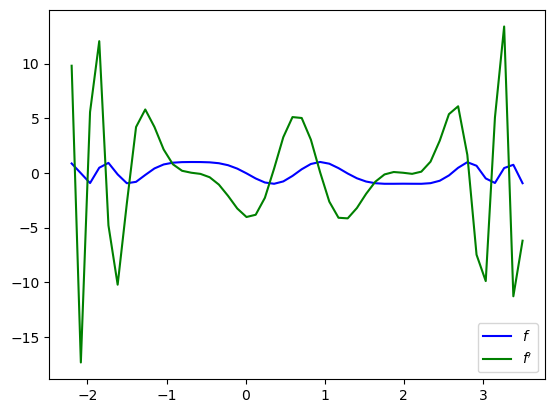

In [7]:
plt.plot(t, f(t, 1.0), color='b', label=r'$f$')
plt.plot(t, df, color='g', label=r"$f'$")
plt.legend()
plt.show()

<br>

### 02. `PyTorch`
- `PyTorch`는 광범위한 GPU 지원 및 다양한 부가 기능을 갖춘 완전한 딥러닝 프레임워크

```linux
> conda install pytorch torchvision cpuonly -c pytorch
```

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [9]:
torch.set_default_dtype(torch.double)

In [10]:
def f(x, a):
    return torch.cos(a*x**3 - 2*x**2 - 4*x)

- `requires_grad=True` 옵션을 설정하여 이 텐서에 대해 그래디언트 계산을 수행할 수 있도록 설정
    * `x`는 함수 `f`의 입력으로 사용되며, 이후 미분값이 `x.grad`에 저장

In [12]:
t = torch.linspace(-2.2, 3.5, 50)
x = torch.zeros(1, requires_grad=True)

In [20]:
for i in range(len(t)):
    
    """그래디언트를 변경하지 않고, 입력변수의 값을 설정"""
    x.data = t[i]
    v = f(x, 1.0)
    
    """그래디언트 계산"""
    v.backward()
    
    """그래디언트 값"""
    df[i] = x.grad

    """다음 값 계산을 위하여 그래디언트 0 초기화"""
    x.grad.zero_()

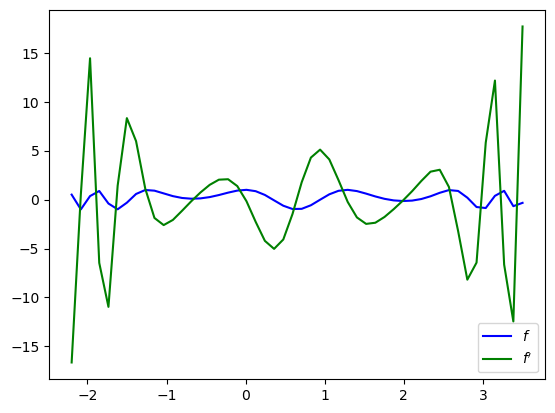

In [21]:
plt.plot(t.numpy(), f(t, 1.0).numpy(), color='b', label=r'$f$')
plt.plot(t.numpy(), df, color='g', label=r"$f'$")
plt.legend()
plt.show()

<br>

## 09-05. 그래디언트 기반 최적화 방법론

<br>

### 뉴턴 방법 (Newton’s method)
- 함수 $f(x)$의 그래디언트와 이차 도함수 (헤시안)을 이용하여, 함수의 국소적 형태를 파악하고,

    $x$를 갱신함으로써 $f(x)$의 최소값을 탐색

$$\mathbf{x}_{n+1} = \mathbf{x}_{n} - [\mathbf{H}_{f(\mathbf{x}_{n})}]^{-1} \nabla f(\mathbf{x}_n)$$

- 뉴턴 방법은 정확도 면에서는 최고의 방법으로 여겨지지만, 이차 미분과 선형 방정식 시스템을 풀어야 하기 대문에, 계산 비용이 높음

<br>

#### 준뉴턴 방법 (Quasi-Newton method)
- 헤시안 행렬을 직접 계산하는 대신 근사하는 방식으로, 계산 비용이 감소
- 대표적으로 BFGS, L-BFGS가 존재

<br>

#### 켤레 그래디언트 방법 (Conjugate Gradient method)
- 이차 문제 (Quaratic problem)에 대해 탐색 방향 $s_{n} = -\nabla f(x_n) + \beta_n s_{n-1}$를 사용하여, $f(x)$의 최소값에 빠르게 수렴하도록 설계

<br>

#### 단순 그래디언트 하강법 (Gradient Descent
- 단순 $\triangledown f(x_n)$만을 사용하여 최적화를 진행
- 함수의 음의 기울기 방향으로 $x$를 반복적으로 업데이트하여 $f(x)$의 최소값을 탐색

<br>

#### 일반적으로는 BFGS와 L-BFGS가 범용적으로 사용

<br>

## 09-06. 확률적 그래디언트 최적화
- 독립 동일 분포 (iid)관측값을 사용하는 최대 가능도 추정과 같은 통계 최적화 문제들은 보통 다음과 같은 형태를 가짐

$$\min_\theta F(\mathbf{\theta}) = \sum_{i=1}^N f(\mathbf{x}_i, \mathbf{\theta}).$$

> 선형회귀
>>    - 데이터 ${(x_i, y_i)}^N_{i=1}$이 주어졌을 때, 여기서 $x_i \in \mathbb{R^d}$는 입력변수이고,
>>
>>- $y_i \in \mathbb{R}$이 출력변수 일때, 선형회귀에서는 모델이 $y_i \approx \beta^T x_i$와 같이 주어지며, $\beta \in \mathbb{R}^d$가 회귀계수
>>
>>- 여기서 최적화는 오차 제곱합을 최소화 하는 문제이며, 각 데이터 포인트에 대해 $f(x_i,\beta)=(y_i -\beta^T x_i)^2$라고 정의 가능
>>
>>$\rightarrow$ 전체 목적함수는
>> $$min_{\theta} F(\mathbf{\theta})=\sum^N_{i=1} (y_i-\beta^T x_i)^2$$

<br>

- 만약 $N \gg 1$인 경우, 전체 관측값을 사용하는 대신, 데이터의 부분 집합 $\{ \mathbf{x}_{s_1}, \dots, \mathbf{x}_{s_M} \}$을 사용하여 그래디언트를 근사

$$\nabla F(\mathbf{\theta}) \approx \frac{N}{M} \sum_{i=1}^M \nabla f(\mathbf{x}_{s_i}, \mathbf{\theta}) =: g(\mathbf{\theta}).$$

- 그 후, $\theta$를 반복적으로 갱신하면

$$\theta_{n+1}=\theta_n - \eta_n g(\theta_n)$$$f$에 조건이 만족될 때 수렴 (학습률 $\eta_n$이 다음 조건을 만족)

$$\sum_{n=1}^\infty \eta_n = \infty, \quad \sum_{n=1}^\infty \eta_n^2 < \infty.$$

<br>

## 09-08. 최적화 예제
### **Student's t-분포의 최대 가능도 추정**

$$p(x|\mu, \sigma, v) = \frac{\Gamma (\frac{v+1}{2})}{\sqrt{v \pi}\;\sigma\;\Gamma(\frac{v}{2})}[1 + \frac{1}{v}(\frac{x-\mu}{\sigma})^2]^{-\frac{v+1}{2}}$$


- $\mu$: 위치 모수, 분포의 중심을 결정
- $\sigma > 0$ : 척도 모수, 분포의 산포를 조절
- $v$ : 자유도, 분포의 꼬리 두께 결정

#### **목표 : 관측값으로부터 Student's t-분포의 최대 가능도 위치 모수 (location parameter)의 척도 모수 (Scale parameter)를 추정하는 것**

* 관측값 $$D=(x_1, \dots, x_n)$$가 주어지면, 다음 목적함수의 최소화 문제로 표현

$$f(\theta)=\sum^n_{i=1}-log\;p(x_i |\theta)$$(음수 부호는 가능도 최대화문제를 최소화 문제로 전환하기 위함)

<br>

#### `Autograd`

In [38]:
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.stats as sst
import autograd
import scipy.optimize

In [39]:
x = npr.randn(100) + 0.5
print('data mean:', x.mean(), 'data std:', x.std())

data mean: 0.4815949045369722 data std: 1.041388049676824


In [40]:
def student_logpdf_autograd(x, m, s, nu):
    return sst.t.logpdf(x, nu, m, s)

In [41]:
def ltarget(theta):
    return -np.sum(student_logpdf_autograd(x, theta[0], np.exp(theta[1]), 5.0))

In [42]:
g = autograd.grad(ltarget)

In [43]:
theta_opt = scipy.optimize.minimize(ltarget, np.zeros(2), method='L-BFGS-B', jac = g)
print('location estimate:', theta_opt.x[0], 'scale estimate:', np.exp(theta_opt.x[1]))

location estimate: 0.5001056827142116 scale estimate: 0.8841509465109852


<br>

#### `PyTorch`

In [52]:
x = torch.randn(100) + 0.5
print('data mean:', x.mean().item(), 'data std:', x.std().item())

data mean: 0.49703578477520133 data std: 1.057602870061466


In [53]:
def student_logpdf_pytorch(x, m, s, nu):
    return torch.distributions.studentT.StudentT(loc=m, scale=s, df=nu).log_prob(x)

In [54]:
def ltarget(theta):
    return -student_logpdf_pytorch(x, theta[0], torch.exp(theta[1]), 5.0).sum()

In [55]:
theta = torch.zeros(2, requires_grad=True)
optimizer = torch.optim.LBFGS([theta])

In [56]:
def closure():
    optimizer.zero_grad()
    l = ltarget(theta)
    l.backward()
    return l

optimizer.step(closure)

tensor(157.6499, grad_fn=<NegBackward0>)

In [57]:
print('location estimate:', theta[0].item(), 'scale estimate:', theta[1].exp().item())

location estimate: 0.4874762148269728 scale estimate: 0.881656808244812


- 유의사항:

    1. 기본 데이터 타입 설정:
    - 통계 계산의 충분한 정확도를 위해 기본 dtype을 torch.double로 설정하는 것이 중요
    - 설정이 없으면 모든 텐서가 단정도(single precision) 부동소수점으로 생성되는데, 이는 신경망에는 괜찮지만 통계적 계산에는 정확도가 부족할 수 있음

    2. 함수 인자에 관한 주의:
    - 일부 `PyTorch` 함수(예: `torch.log()`)는 인자로 스칼라나 `NumPy` 배열 대신 `torch.tensor(...)`로 생성된 텐서를 요구

    3. PyTorch BFGS 최적화기:
    - `PyTorch`의 BFGS 최적화기는 함수 값을 평가하는 클로저(closure)를 명시적으로 지정
    - 비록 최적화기는 `.step()` 메서드로 호출되지만, 내부적으로는 지정된 최대 단계나 수렴 기준에 도달할 때까지 여러 번의 업데이트를 수행

    4. 텐서 출력:
    - 단일 `float` 값을 추출하려면 `.item()`을 사용하고, `NumPy` 배열로 변환하려면 `.numpy()`를 사용 (단, `requires_grad=True`인 텐서는 제외)